## Heart Disease Prediction

- Download the data from this

  https://www.kaggle.com/datasets/utkarshx27/heart-disease-diagnosis-dataset?rvi=1

- Unzip the file and load the dataset

### Loading the Data

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("dataset_heart.csv")
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [6]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


### Exploratory Data Analysis(EDA)

In [7]:
columns = ['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral', 'resting electrocardiographic results', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal', 'heart disease']

In [8]:
df.columns = map(str.lower, df.columns)

df.columns = df.columns.str.replace(' ', '_')

In [9]:
df

,age,sex_,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,st_segment,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [10]:
print(df.dtypes)

age                                       int64
sex_                                      int64
chest_pain_type                           int64
resting_blood_pressure                    int64
serum_cholestoral                         int64
fasting_blood_sugar                       int64
resting_electrocardiographic_results      int64
max_heart_rate                            int64
exercise_induced_angina                   int64
oldpeak                                 float64
st_segment                                int64
major_vessels                             int64
thal                                      int64
heart_disease                             int64
dtype: object


In [11]:
numeric_features = list(df.select_dtypes(include=[np.number]).columns)
print(numeric_features)

['age', 'sex_', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'st_segment', 'major_vessels', 'thal', 'heart_disease']


In [12]:
target = 'heart_disease'
numeric_features.remove(target)

print(numeric_features)

['age', 'sex_', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'st_segment', 'major_vessels', 'thal']


In [13]:
df[numeric_features] = df[numeric_features].astype(int)

heart_disease
1    0.56
2    0.44
Name: proportion, dtype: float64


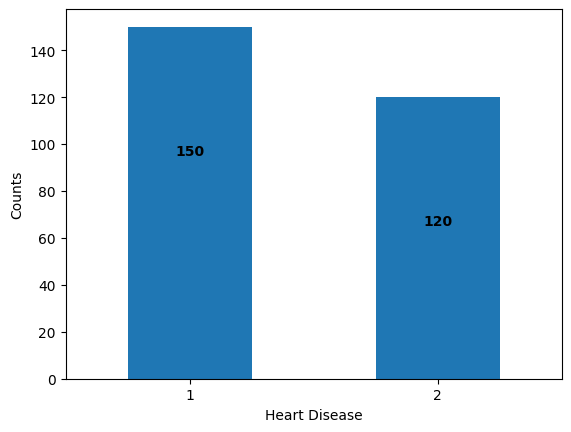

In [14]:
print(df[target].value_counts(normalize=True).round(2))

df[target].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Heart Disease')
plt.ylabel('Counts')

for i, count in enumerate(df[target].value_counts()):
    plt.text(i, count-50, count,  ha='center', va='top', fontweight='bold')

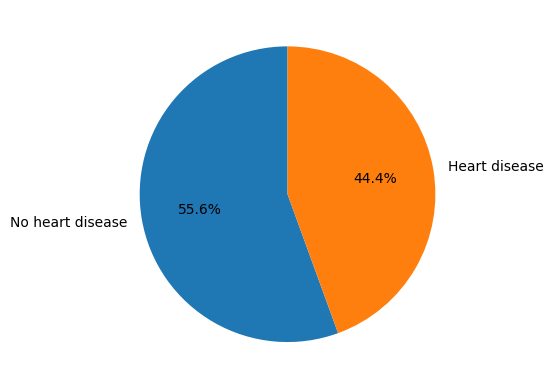

In [15]:
df[target].value_counts().plot(kind='pie', labels=['No heart disease', 'Heart disease'], autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

### Data Processing and Feature Analysis

In [16]:
from sklearn.metrics import mutual_info_score

In [17]:
df.head()

,age,sex_,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,st_segment,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0,1,1,3,1


In [18]:
print(numeric_features)

['age', 'sex_', 'chest_pain_type', 'resting_blood_pressure', 'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 'max_heart_rate', 'exercise_induced_angina', 'oldpeak', 'st_segment', 'major_vessels', 'thal']


Overall Rate 1.4444444444444444
                    Feature Value  Percentage  Difference     Ratio      Risk
82        serum_cholestoral   259         2.0    0.555556  0.384615  1.384615
17        serum_cholestoral   185         2.0    0.555556  0.384615  1.384615
39   resting_blood_pressure   165         2.0    0.555556  0.384615  1.384615
4         serum_cholestoral   164         2.0    0.555556  0.384615  1.384615
37   resting_blood_pressure   158         2.0    0.555556  0.384615  1.384615
5         serum_cholestoral   166         2.0    0.555556  0.384615  1.384615
6         serum_cholestoral   167         2.0    0.555556  0.384615  1.384615
8         serum_cholestoral   172         2.0    0.555556  0.384615  1.384615
16        serum_cholestoral   184         2.0    0.555556  0.384615  1.384615
44        serum_cholestoral   218         2.0    0.555556  0.384615  1.384615
31   resting_blood_pressure   146         2.0    0.555556  0.384615  1.384615
29   resting_blood_pressure   14

/tmp/ipykernel_4386/111481214.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, grouped], axis=0)


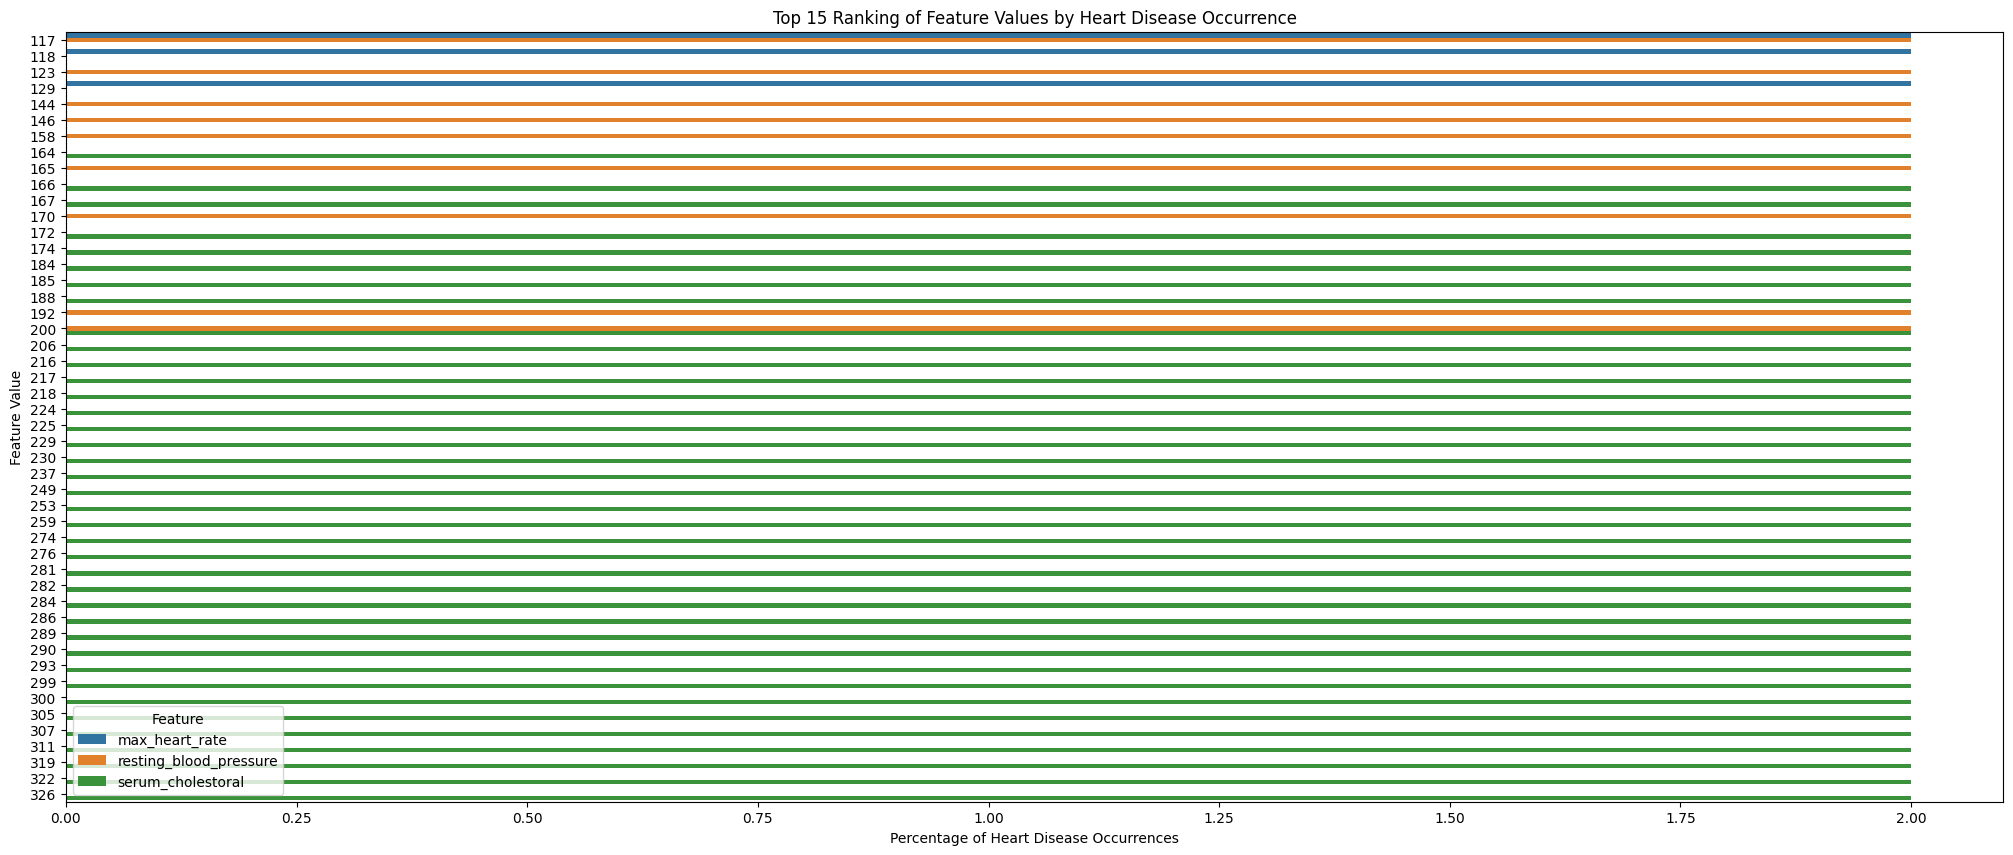

In [19]:
feature_importance = []

# Create a dataframe for the analysis
results = pd.DataFrame(columns=['Feature', 'Value', 'Percentage'])

for feature in numeric_features:    
    grouped = df.groupby(feature)[target].mean().reset_index()
    grouped.columns = ['Value', 'Percentage']
    grouped['Feature'] = feature
    results = pd.concat([results, grouped], axis=0)

# Sort the results by percentage in descending order and get the top 10
results = results.sort_values(by='Percentage', ascending=False).head(50)

# get the overall heart diease occurrence rate
overall_rate = df[target].mean()
print('Overall Rate',overall_rate)

# calculate the difference between the feature value percentage and the overall rate
results['Difference'] = results['Percentage'] - overall_rate

# calculate the ratio of the difference to the overall rate
results['Ratio'] = results['Difference'] / overall_rate

# calculate the risk of heart disease occurrence for each feature value
results['Risk'] = results['Percentage'] / overall_rate

# sort the results by ratio in descending order
results = results.sort_values(by='Risk', ascending=False)

print(results)
plt.figure(figsize=(25, 10))
sns.barplot(orient='h', data=results, x='Percentage', y='Value', hue='Feature')
plt.xlabel('Percentage of Heart Disease Occurrences')
plt.ylabel('Feature Value')
plt.title('Top 15 Ranking of Feature Values by Heart Disease Occurrence')
plt.show()

### Mutual Information Score

serum_cholestoral                       0.421875
max_heart_rate                          0.246204
thal                                    0.144560
chest_pain_type                         0.133225
major_vessels                           0.121494
age                                     0.106801
resting_blood_pressure                  0.100872
oldpeak                                 0.100548
exercise_induced_angina                 0.090050
st_segment                              0.077045
sex_                                    0.046368
resting_electrocardiographic_results    0.016741
fasting_blood_sugar                     0.000134
dtype: float64


Text(0.5, 1.0, 'Mutual Info Score on various features')

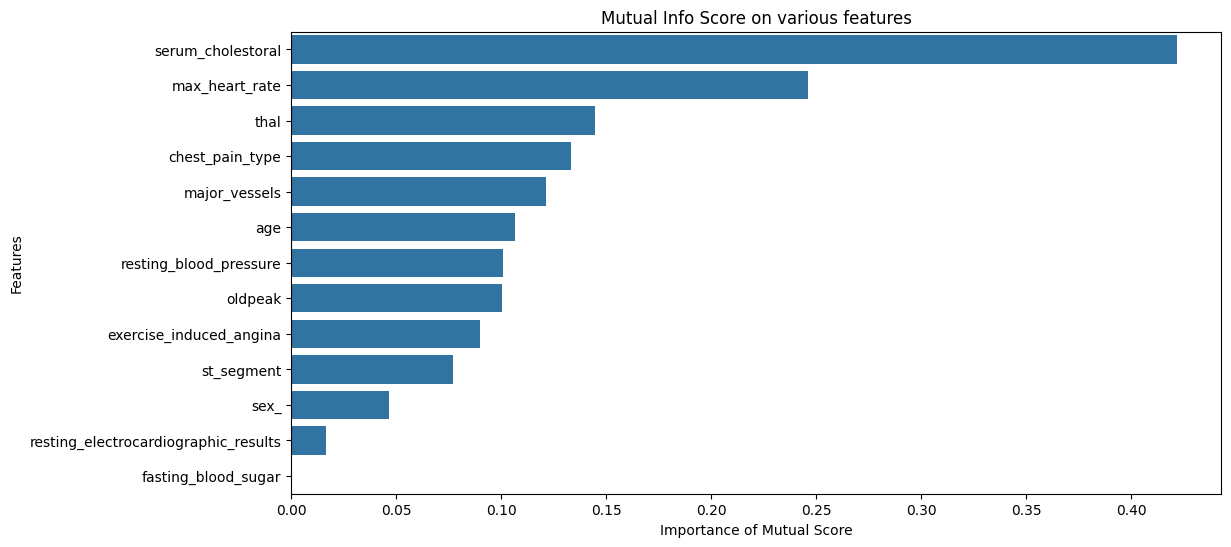

In [20]:
x = df[numeric_features]
y = df[target]

def mutual_heart_info(series):
    return mutual_info_score(series, y) 

mi_score = x.apply(mutual_heart_info)
mi_ranking = pd.Series(mi_score, index=x.columns).sort_values(ascending=False)

print(mi_ranking)

plt.figure(figsize=(12,6))
sns.barplot(x=mi_ranking.values, y=mi_ranking.index)
plt.xlabel('Importance of Mutual Score')
plt.ylabel('Features')
plt.title('Mutual Info Score on various features')

### Model Training

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [37]:
target = 'heart_disease'

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.heart_disease.values
y_test = df_test.heart_disease.values
y_val = df_val.heart_disease.values

del df_train['heart_disease']
del df_val['heart_disease']
del df_test['heart_disease']

In [38]:
df_train

,age,sex_,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,max_heart_rate,exercise_induced_angina,oldpeak,st_segment,major_vessels,thal
0,62,0,3,130,263,0,0,97,0,1,2,1,7
1,61,0,4,145,307,0,2,146,1,1,2,0,7
2,54,1,4,124,266,0,2,109,1,2,2,1,7
3,58,0,4,100,248,0,2,122,0,1,2,0,3
4,68,1,3,180,274,1,2,150,1,1,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,44,1,4,112,290,0,2,153,0,0,1,1,3
158,44,0,3,108,141,0,0,175,0,0,2,0,3
159,53,1,4,140,203,1,2,155,1,3,3,0,7
160,62,1,4,120,267,0,0,99,1,1,2,2,7


### Using Different Models

In [65]:
# Using Linear Regression
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"Score of the model: {model.score(X_val, y_val)}")

preds = model.predict(X_val)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")
print(f"Accuracy Score: {accuracy_score(y_val, y_test)}")

Score of the model: 0.36372275515119834
RMSE of the base model: 0.664
Accuracy Score: 0.3888888888888889


In [54]:
# Using Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X_train, y_train)
print(f"Score of the model: {regressor.score(X_val, y_val)}")

preds = regressor.predict(X_val)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

Score of the model: 0.035714285714285476
RMSE of the base model: 0.770


In [52]:
# Using Random Forest Regressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(X_train, y_train)
print(f"Score of the model: {regr.score(X_val, y_val)}")

preds = regr.predict(X_val)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

Score of the model: 0.38928615367776653
RMSE of the base model: 0.622


In [39]:
# Using XGboost
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(df_test, y_test)

params = {"objective": "reg:squarederror", "tree_method": "hist", "device": "cuda"}
n=100
model = xgb.train(params=params, dtrain=dtrain_reg, num_boost_round=n)

preds = model.predict(dtest_reg)
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 0.661


### Saving and Loading the Model

In [63]:
import pickle

In [64]:
output_file = 'model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print(f'the model is saved to {output_file}')

the model is saved to model.bin


In [71]:
patient = dict(df.iloc[1, :10])
patient

{'age': 67,
 'sex_': 0,
 'chest_pain_type': 3,
 'resting_blood_pressure': 115,
 'serum_cholestoral': 564,
 'fasting_blood_sugar': 0,
 'resting_electrocardiographic_results': 2,
 'max_heart_rate': 160,
 'exercise_induced_angina': 0,
 'oldpeak': 1}